Figures for Section 3.3

In [6]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

np.random.seed(12345)

In [7]:
# create ARMA
def createARMA(ar_l,ma_l,n_samples):
    ar = np.array(ar_l)
    ma = np.array(ma_l)

    return ArmaProcess(ar, ma).generate_sample(nsample=n_samples)
    #return ArmaProcess(ar, ma, n_samples)

In [8]:
def plotARMA(simulated_data):
    plot_acf(simulated_data, lags=25);
    plot_pacf(simulated_data, lags=25);

    #lag_acf = acf(simulated_data, nlags=25)
    #lag_pacf = pacf(simulated_data, nlags=25)

    #fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax1.plot(lag_acf, 'o-')  

    #ax2.plot(lag_pacf, 'o-')  

    #plt.title(f"Simulated ARMA({p},{q}) Process")
    #plt.xlim([0, 100])
    plt.show()

Figure 3.5

The ACFs and PACFs of an AR(2) process (upper panel), and MA(3) process (middle panel)
and and ARMA(1,1) process (lower panel).

In [9]:
n_samples = 100

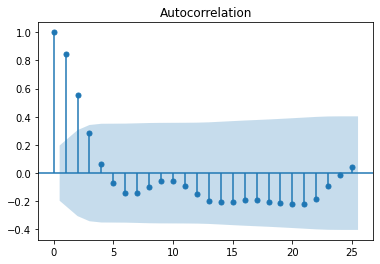

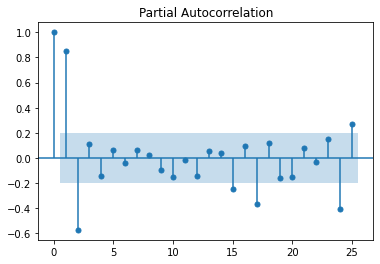

In [164]:
# Define the ARMA parameters
ar_arr = [1, -1.5, 0.75]
ma_arr = [1]

simulated_data = createARMA(ar_arr,ma_arr,n_samples)

plotARMA(simulated_data)

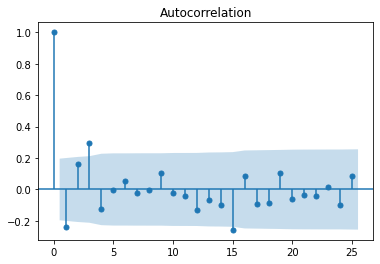

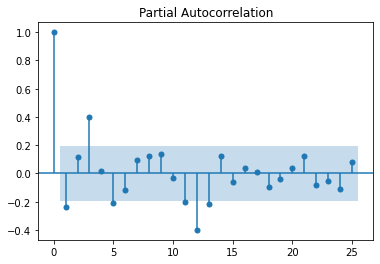

In [165]:
# Define the ARMA parameters
ar_arr = [1]
ma_arr = [1, 1.5, -0.75, 3]

simulated_data = createARMA(ar_arr,ma_arr,n_samples)

plotARMA(simulated_data)

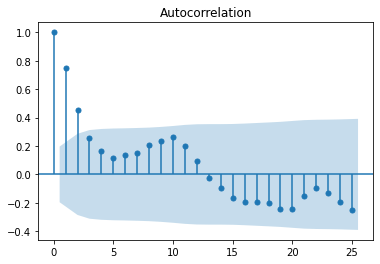

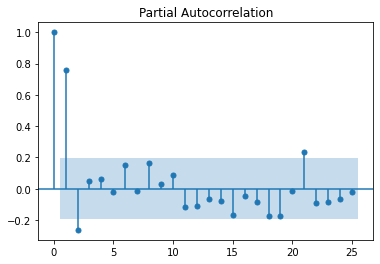

In [41]:
# Define the ARMA parameters
ar_arr = [1, -0.7]
ma_arr = [1, 0.3]

simulated_data = createARMA(ar_arr,ma_arr,n_samples)

plotARMA(simulated_data) 

# according to calculation, acf should be positive. but why??

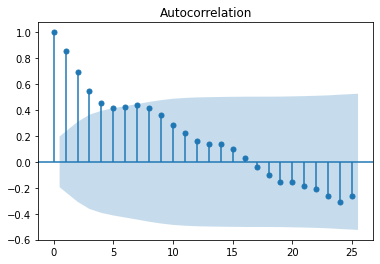

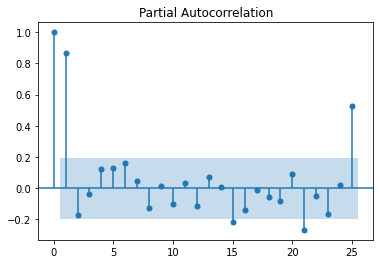

In [53]:
arparams = np.array([.7])
maparams = np.array([.3])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = ArmaProcess(ar, ma)
simulated_data = arma_process.generate_sample(nsample=100)

plot_acf(simulated_data, lags=25);
plot_pacf(simulated_data, lags=25);


Figure 3.6

The recruitment series of Example 3.3.5 (left), its sample ACF (middle) and sample PACF
(right).

In [ ]:
# show many plots in one figure


References

1. https://towardsdatascience.com/advanced-time-series-analysis-with-arma-and-arima-a7d9b589ed6d